In [11]:
import numpy as np
import json
import yaml
import os
import skimage.io
import matplotlib.pyplot as plt

from mrcnn import model as modellib, utils as utilslib, visualize

In [6]:
data_dir = '/nfs/diskstation/andrew_lee/wisdom_real_targets/'

with open(os.path.join(data_dir, 'train_labels.yml'), 'r') as f:
    train_labels = yaml.load(f)

with open(os.path.join(data_dir, 'test_labels.yml'), 'r') as f:
    test_labels = yaml.load(f)

train_indices = np.load(os.path.join(data_dir, 'train_indices.npy'))
test_indices = np.load(os.path.join(data_dir, 'test_indices.npy'))

train_piles, test_piles = set(), set()

for i in range(400):
    with open(os.path.join(data_dir, 'color_ims', 'image_{:06d}.json'.format(i))) as f:
        annos = json.load(f)
        
        for l in annos['labels']:
            if l['label_class'] in train_labels:
                train_piles.add(i)
            if l['label_class'] in test_labels:
                test_piles.add(i)
        print([l['label_class'] for l in annos['labels']])
        
print(train_piles, test_piles)


['pipe_clamp', 'dasani_drops', 'vaseline', 'chili_powder', 'cigar']
['pipe_clamp', 'philippines_pouch', 'blue_sharpie']
['clean_and_clear', 'campbells_soup', 'rock', 'mouse_traps']
['pear', 'candle_lighter', 'pencil_sharpeners', 'obj', 'campbells_soup', 'clamp']
['can_of_corn', 'playing_cards', 'mango', 'mushroom']
['chili_powder', 'red_climbing_hold', 'kind_bar']
['mango', 'toothbrushes', 'bialetti', 'gorilla_glue', 'zoink', 'small_bag_clip']
['pencil_sharpeners', 'vaseline', 'sardines_can', 'clean_and_clear', 'pear']
['arm_and_hammer_deoderant', 'dice', 'cigar', 'pipe_clamp', 'starfruit']
['starfruit', 'kind_bar', 'dasani_drops', 'pipe_clamp']
['clamp', 'rock', 'clean_and_clear', 'pipe_clamp']
['mouse_traps', 'arm_and_hammer_deoderant', 'red_climbing_hold', 'dice', 'blue_sharpie', 'dasani_drops']
['lime', 'clamp', 'arm_and_hammer_deoderant', 'pencil_sharpeners', 'starfruit']
['toothbrushes', 'hammer', 'zoink', 'stamp', 'gorilla_glue', 'mayonnaise']
['banana', 'gorilla_glue']
['blue_s

['toothbrushes', 'egg', 'peach']
['can_of_corn', 'bialetti', 'toothbrushes', 'green_spray_bottle', 'stamp', 'crayons']
['saline_wipes', 'hammer', 'watermelon', 'playing_cards']
['saline_wipes', 'mayonnaise']
['mango', 'toothpaste', 'can_of_corn', 'banana']
['toothpaste', 'gorilla_glue', 'toothbrushes']
['bialetti', 'large_bag_clip', 'hammer', 'can_of_corn', 'flashlight', 'whale_tail']
['hammer', 'watermelon', 'bialetti']
['bialetti', 'toothbrushes', 'gorilla_glue', 'flashlight', 'elmers_glue', None, 'italian_seasoning', 'can_of_corn', 'mango']
['saline_wipes', 'green_spray_bottle', 'flashlight', 'peach']
['can_of_corn', 'crayons']
['small_bag_clip', 'gorilla_glue']
['elmers_glue', 'mushroom', 'toothbrushes']
['watermelon', 'large_bag_clip', 'toothpaste', 'egg']
['can_of_corn', 'large_bag_clip', 'zoink']
['large_bag_clip', 'playing_cards']
['can_of_corn', 'crayons', 'green_spray_bottle', 'egg', 'flashlight', 'small_bag_clip']
['mayonnaise', 'italian_seasoning', 'elmers_glue']
['crayons'

['small_bag_clip', 'elmers_glue', 'mayonnaise', 'green_spray_bottle']
['toothpaste', 'mushroom', 'stamp', 'whale_tail', 'gorilla_glue', 'large_bag_clip', 'crayons']
['large_bag_clip', 'green_spray_bottle', 'whale_tail']
['toothpaste', 'peach']
['zoink', 'crayons', 'toothbrushes', 'mayonnaise', 'stamp', 'saline_wipes']
['green_spray_bottle', 'stamp', 'zoink', 'playing_cards', 'crayons', 'peach', 'banana', 'object']
['stamp', 'bialetti', 'gorilla_glue', 'elmers_glue', 'peach']
['mayonnaise', 'watermelon', 'gorilla_glue', 'egg', 'zoink', 'mushroom']
['banana', 'whale_tail', 'hammer', 'bialetti', 'small_bag_clip', 'mayonnaise']
['whale_tail', 'playing_cards', 'stamp', 'large_bag_clip', 'green_spray_bottle', 'bialetti']
['flashlight', 'peach', 'toothbrushes', 'crayons', 'small_bag_clip', 'bialetti']
['hammer', 'stamp', 'mushroom', 'toothbrushes']
['small_bag_clip', 'mushroom', 'elmers_glue', 'toothbrushes', 'large_bag_clip']
['saline_wipes', 'flashlight', 'stamp', 'mayonnaise', 'can_of_corn

['chili_powder', 'dasani_drops']
['lime', 'clean_and_clear', 'dice', 'neutrogena', 'blue_sharpie', 'campbells_soup', 'kind_bar']
['lime', 'arm_and_hammer_deoderant', 'dice', 'mouse_traps', 'whiteboard_cleaner']
['blue_tape', 'arm_and_hammer_deoderant', 'neutrogena', None, 'candle_lighter', 'chili_powder', 'philippines_pouch', 'object', 'kind_bar']
['clamp', 'campbells_soup', 'whiteboard_cleaner', 'red_climbing_hold', 'rock']
['cigar', 'philippines_pouch', 'arm_and_hammer_deoderant', 'vaseline']
['campbells_soup', 'kind_bar', 'pipe_clamp', 'rock', 'chili_powder', 'blue_tape', 'dice', 'lime']
['campbells_soup', 'vaseline', 'rock', 'lime', 'cigar']
['vaseline', 'campbells_soup']
['clamp', 'red_climbing_hold', 'pencil_sharpeners']
['red_climbing_hold', 'dice', 'blue_tape']
['whiteboard_cleaner', 'clamp', 'kind_bar', 'cigar', 'vaseline', 'candle_lighter']
['candle_lighter', 'dice', 'clean_and_clear', 'red_climbing_hold']
{0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 15, 21, 23, 24, 25, 27, 29, 32, 3

In [7]:
train_piles.intersection(test_piles)
# These piles have objects in both the train and test object sets

{23, 32, 37, 91}

In [8]:
print(train_labels)
print(test_labels)

['dasani_drops', 'red_climbing_hold', 'mouse_traps', 'pear', 'whiteboard_cleaner', 'clean_and_clear', 'dice', 'philippines_pouch', 'vaseline', 'sardines_can', 'clamp', 'chili_powder', 'rock', 'blue_tape', 'kind_bar', 'neutrogena', 'blue_sharpie', 'lime', 'pipe_clamp', 'pencil_sharpeners', 'arm_and_hammer_deoderant', 'candle_lighter', 'campbells_soup', 'starfruit', 'cigar']
['large_bag_clip', 'can_of_corn', 'italian_seasoning', 'elmers_glue', 'hammer', 'peach', 'toothbrushes', 'mango', 'mayonnaise', 'watermelon', 'egg', 'bialetti', 'stamp', 'crayons', 'small_bag_clip', 'green_spray_bottle', 'playing_cards', 'saline_wipes', 'banana', 'toothpaste', 'gorilla_glue', 'whale_tail', 'flashlight', 'mushroom', 'zoink']


In [9]:
[(o['label_class'], o['object_id']) for o in\
 json.load(open(os.path.join(data_dir, 'color_ims', 'image_000066.json')))['labels']]

[('watermelon', 1),
 ('stamp', 2),
 ('mango', 3),
 ('italian_seasoning', 4),
 ('large_bag_clip', 6),
 ('toothpaste', 8),
 ('small_bag_clip', 9),
 ('saline_wipes', 10),
 ('flashlight', 11),
 ('green_spray_bottle', 14),
 ('whale_tail', 15)]

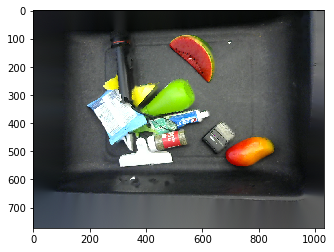

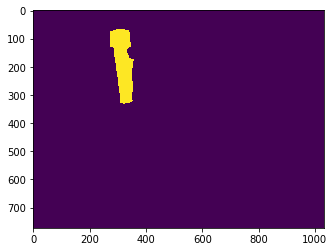

In [10]:
plt.imshow(skimage.io.imread(os.path.join(data_dir, 'color_ims', 'image_000066.png')))
plt.show()
plt.imshow(skimage.io.imread(os.path.join(data_dir, 'modal_segmasks', 'image_000066.png'))== 9)
plt.show()

In [26]:
import yaml
f = open('/nfs/diskstation/andrew_lee/wisdom_real_targets/all_labels.yml')
object_names = yaml.load(f)
f.close()
object_names

['dasani_drops',
 'red_climbing_hold',
 'mouse_traps',
 'pear',
 'whiteboard_cleaner',
 'clean_and_clear',
 'dice',
 'philippines_pouch',
 'vaseline',
 'sardines_can',
 'clamp',
 'chili_powder',
 'rock',
 'blue_tape',
 'kind_bar',
 'neutrogena',
 'blue_sharpie',
 'lime',
 'pipe_clamp',
 'pencil_sharpeners',
 'arm_and_hammer_deoderant',
 'candle_lighter',
 'campbells_soup',
 'starfruit',
 'cigar',
 'large_bag_clip',
 'can_of_corn',
 'italian_seasoning',
 'elmers_glue',
 'hammer',
 'peach',
 'toothbrushes',
 'mango',
 'mayonnaise',
 'watermelon',
 'egg',
 'bialetti',
 'stamp',
 'crayons',
 'small_bag_clip',
 'green_spray_bottle',
 'playing_cards',
 'saline_wipes',
 'banana',
 'toothpaste',
 'gorilla_glue',
 'whale_tail',
 'flashlight',
 'mushroom',
 'zoink']

In [28]:
data_tuples = []

for i in test_indices:
    anno = json.load(open(os.path.join(data_dir, 'color_ims', 'image_{:06d}.json'.format(i))))
#     print('image', i)
#     print([(o['label_class'], o['object_id']) for o in anno['labels']])
    pile_path = 'image_{:06}.png'.format(i)
#     print('img', i)
    for i, obj in enumerate(anno['labels']):
#         target_index = obj['object_id']
#  Object id is not necessarily position in array
        target_index = i + 1 # because 0 is bg, increment all positions by 1 to get mask ind
        target_name = obj['label_class']
        
#         print(target_name)
        if target_name in object_names:
            for target_img in os.listdir(os.path.join(data_dir, 'target_images', target_name)):
#                 print(target_img)
                target_path = os.path.join(target_name, target_img)

                tup = (target_path, pile_path, target_index)
                data_tuples.append(tup)
        else:
            print('pile_path, target_name, all_labels\n', pile_path, target_name, [o['label_class'] for o in anno['labels']])
            print()

pile_path, target_name, all_labels
 image_000039.png None ['italian_seasoning', 'saline_wipes', 'toothpaste', 'mushroom', 'mango', None, 'small_bag_clip', 'watermelon']

pile_path, target_name, all_labels
 image_000049.png None ['mushroom', None, 'zoink']

pile_path, target_name, all_labels
 image_000069.png obj ['bialetti', 'playing_cards', 'mango', 'obj']

pile_path, target_name, all_labels
 image_000086.png obj ['obj', 'peach', 'saline_wipes', 'large_bag_clip', 'bialetti', None]

pile_path, target_name, all_labels
 image_000086.png None ['obj', 'peach', 'saline_wipes', 'large_bag_clip', 'bialetti', None]

pile_path, target_name, all_labels
 image_000088.png None ['stamp', 'mushroom', 'banana', None, 'can_of_corn', 'whale_tail', 'green_spray_bottle']

pile_path, target_name, all_labels
 image_000122.png None ['watermelon', 'peach', 'mango', 'mayonnaise', None]

pile_path, target_name, all_labels
 image_000131.png None ['bialetti', 'toothbrushes', 'gorilla_glue', 'flashlight', 'elmers

In [12]:
json.dump(data_tuples, open(os.path.join(data_dir, 'target.json'), 'w'))

In [71]:
data_tuples[5157]

('small_bag_clip/view_000002.png', 'image_000275.png', 7)

In [19]:
from sd_maskrcnn import utils
from sd_maskrcnn.config import MaskConfig
from sd_maskrcnn.dataset import ImageDataset, TargetDataset
from sd_maskrcnn.coco_benchmark import coco_benchmark

from mrcnn import model as modellib, utils as utilslib, visualize

target_dataset = TargetDataset('/nfs/diskstation/andrew_lee/wisdom_real_targets',
                              'color_ims', 'modal_segmasks', 'target_images')
target_dataset.load()
target_dataset.prepare()

test_dataset = TargetDataset('/home/andrew_lee/sd-maskrcnn/data/')
test_dataset.load()
test_dataset.prepare()


In [6]:
# where target index doesn't correspond to number of actual masks
for i in target_dataset.image_ids:
    if i % 100 == 0:
        print(i)
    num_masks = target_dataset.load_mask(i)[0].shape[2]
    target_index = target_dataset.load_target_index(i)
    if target_index >= num_masks:
        print(i, target_index, num_masks)
        print(target_dataset.data_tuples[i])

0
100
200
300
375 8 8
['small_bag_clip/view_000000.png', 'image_000035.png', 9]
376 8 8
['small_bag_clip/view_000001.png', 'image_000035.png', 9]
377 8 8
['small_bag_clip/view_000002.png', 'image_000035.png', 9]
378 8 8
['small_bag_clip/view_000003.png', 'image_000035.png', 9]
379 8 8
['small_bag_clip/view_000004.png', 'image_000035.png', 9]
400
500
600
700
800


KeyboardInterrupt: 

In [ ]:
print(target_dataset.load_mask(375)[0].shape)
test_mask = target_dataset.load_mask(375)[0]
for i in range(test_mask.shape[2]):
    plt.imshow(test_mask[:,:,i])
    plt.show()

In [ ]:
for i in target_dataset.image_ids:
    try:
        target_dataset.load_image(i)
    except Exception as e:
        print('id', i, target_dataset.data_tuples[i], e)

In [8]:
def show_target_tuple_dataset(dataset, image_id):
    target_img = dataset.load_target(image_id)
    pile_img = dataset.load_image(image_id)
    masks, _ = dataset.load_mask(image_id)
    target_ind = dataset.load_target_index(image_id)
    print('target_ind', target_ind)
    mask = masks[:,:,target_ind]
    print(masks.shape)
    plt.subplot(131)
    plt.imshow(target_img)
    plt.subplot(132)
    plt.imshow(pile_img)
    plt.subplot(133)
    plt.imshow(mask)
    plt.show()

target_ind 2
(772, 1032, 8)


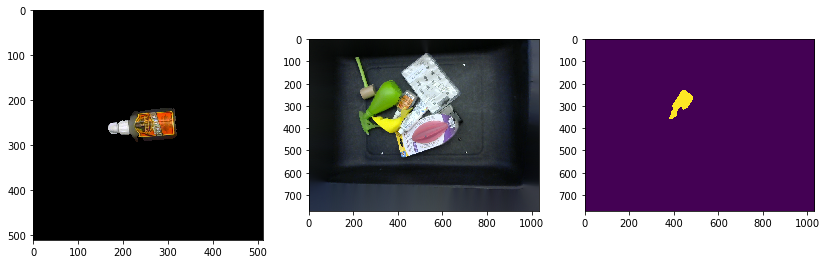

In [17]:
plt.figure(figsize=(14, 8))
show_target_tuple_dataset(target_dataset, 120)

target_ind 2
(772, 1032, 4)


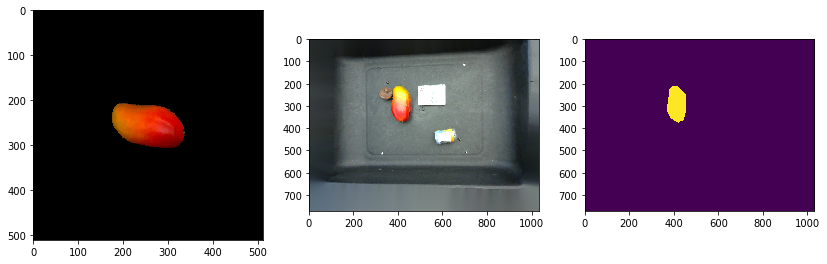

In [20]:
plt.figure(figsize=(14, 8))
show_target_tuple_dataset(target_dataset, 12)